# Praveer Raj
## Maths and computing(batch 1)
## Roll. no. 1
## Date: 20-01-2025
## LAB 3 Q 1

1. Use the “diabetes.csv” dataset and note down the meta information.

In [12]:
import pandas as pd
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = diabetes_data.iloc[:, :9]

print("Meta Information:")
print(diabetes_data.info())
print("\nDescriptive Statistics:")
print(diabetes_data.describe())


Meta Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.1

2. Compute mean & standard deviation, tabulate and visualize the age of the patients.


Mean Age: 33.24
Standard Deviation of Age: 11.76


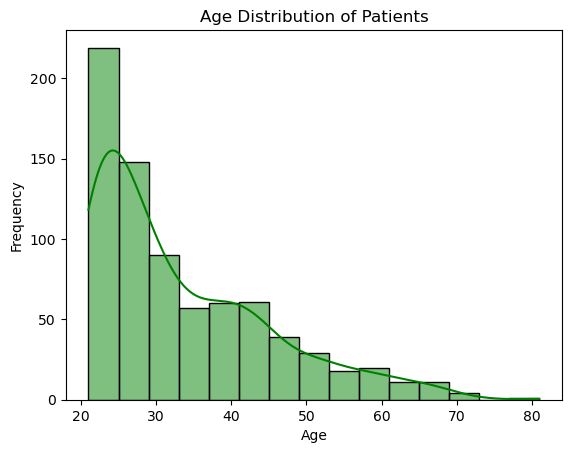

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_age = diabetes_data['Age'].mean()
std_age = diabetes_data['Age'].std()

print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_age:.2f}")

sns.histplot(diabetes_data['Age'], kde=True, bins=15, color='green')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


3. Analyze and tabulate the relationship of age, BMI of patients with respect to the class.

Relationship of Age and BMI with respect to Outcome:
               Age        BMI
Outcome                      
0        31.190000  30.304200
1        37.067164  35.142537


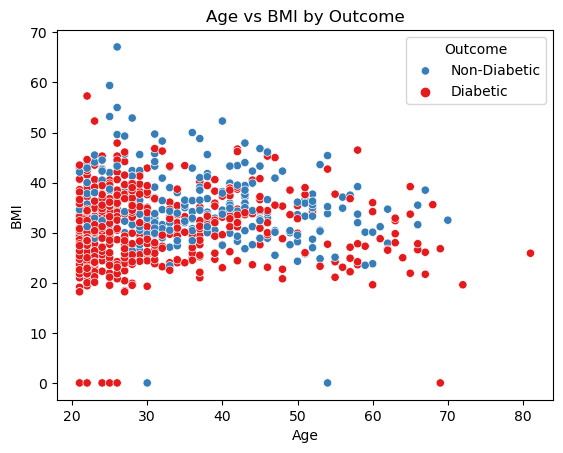

In [19]:
relationship_table = diabetes_data.groupby('Outcome')[['Age', 'BMI']].mean()
print("Relationship of Age and BMI with respect to Outcome:")
print(relationship_table)

sns.scatterplot(data=diabetes_data, x='Age', y='BMI', hue='Outcome', palette='Set1')
plt.title('Age vs BMI by Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()


4. Tabulate the class label and comment on whether the classes are balanced.

Class Distribution:
0    500
1    268
Name: Outcome, dtype: int64


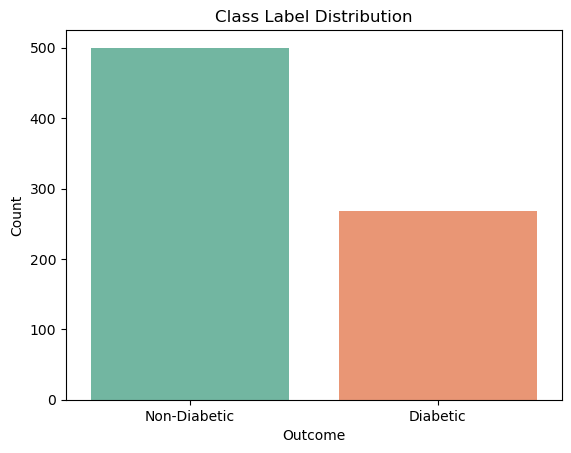

The classes are imbalanced.


In [21]:
class_counts = diabetes_data['Outcome'].value_counts()
print("Class Distribution:")
print(class_counts)

sns.countplot(x='Outcome', data=diabetes_data, palette='Set2')
plt.title('Class Label Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

if abs(class_counts[0] - class_counts[1]) > 0.1 * len(diabetes_data):
    print("The classes are imbalanced.")
else:
    print("The classes are relatively balanced.")


5. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = diabetes_data.iloc[:, :9]
diabetes_data = diabetes_data.apply(pd.to_numeric, errors='coerce').dropna()

X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

print("Logistic Regression Model Training Complete.")
print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Labels:", y_test.values[:10])


Logistic Regression Model Training Complete.
First 10 Predictions: [0 0 0 0 1 0 0 1 1 1]
First 10 Actual Labels: [0 0 0 0 0 0 0 0 0 0]


6. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map.

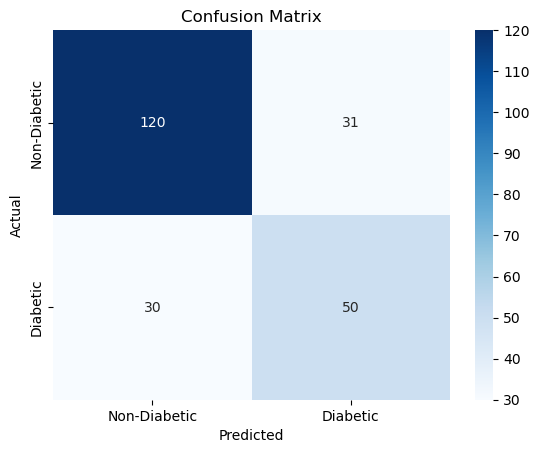

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


7. Compute accuracy rate, true positive and true negative rate and comment on the performance

In [25]:
import numpy as np


accuracy = np.mean(y_pred == y_test)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)  
tnr = tn / (tn + fp)  

print(f"Accuracy: {accuracy:.2f}")
print(f"True Positive Rate (TPR): {tpr:.2f}")
print(f"True Negative Rate (TNR): {tnr:.2f}")

if tpr > 0.8 and tnr > 0.8:
    print("The classifier performs well on both positive and negative cases.")
else:
    print("The classifier may require improvement in some areas.")


Accuracy: 0.74
True Positive Rate (TPR): 0.62
True Negative Rate (TNR): 0.79
The classifier may require improvement in some areas.


8. Visualize the ROC curve, and comment on the performance of the classifier.

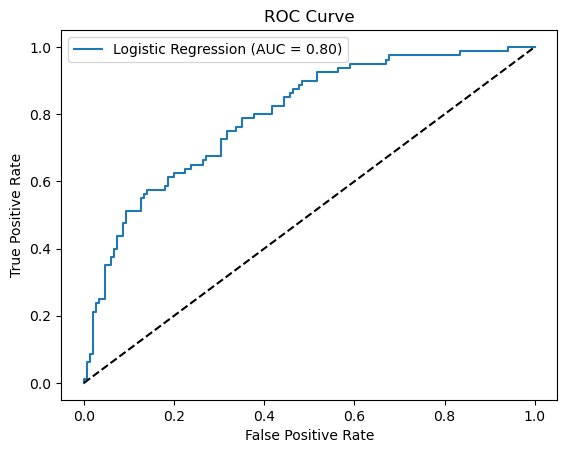

ROC AUC Score: 0.80
The classifier may need further tuning to improve performance.


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"ROC AUC Score: {roc_auc:.2f}")
if roc_auc > 0.8:
    print("The classifier shows strong performance based on the ROC AUC score.")
else:
    print("The classifier may need further tuning to improve performance.")
